In [21]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as sk

In [22]:
def scaleData(dataFrame,flag,tLabel):
    df = dataFrame.copy()

    for var in df.drop(tLabel,axis=1):
        mean = df[var].mean()
        std = df[var].std()
        l1 = (df[var].abs()).sum()

        if(flag == 1):
            df[var] = (df[var]-mean)/std
        else:
            df[var] = df[var]/l1

    return df

      lcavol   lweight       age      lbph       svi       lcp   gleason  \
1  -1.523680 -1.797414 -1.965590 -0.995955 -0.533063 -0.836769 -1.031712   
2  -1.857204 -0.643057 -0.899238 -0.995955 -0.533063 -0.836769 -1.031712   
3  -1.468157 -1.961526  1.233468 -0.995955 -0.533063 -0.836769  0.378996   
4  -2.025981 -0.720349 -0.899238 -0.995955 -0.533063 -0.836769 -1.031712   
5  -0.452342 -0.406493 -0.366061 -0.995955 -0.533063 -0.836769 -1.031712   
6  -1.901925 -0.833573 -1.965590 -0.995955 -0.533063 -0.836769 -1.031712   
8  -0.499235 -0.181701 -0.899238  1.001211 -0.533063 -0.836769 -1.031712   
11 -0.852131 -0.046097  0.033821 -0.995955 -0.533063 -0.836769 -1.031712   
12 -2.141144 -0.057546 -0.232767  0.816796 -0.533063 -0.836769 -1.031712   
13  0.241382 -1.265727 -0.232767 -0.995955 -0.533063 -0.273880  0.378996   
14  0.131626 -1.317410  0.300409 -0.995955 -0.533063 -0.836769  0.378996   
16  0.183220 -1.185595  0.167115 -0.995955 -0.533063 -0.836769 -1.031712   
17 -1.391454

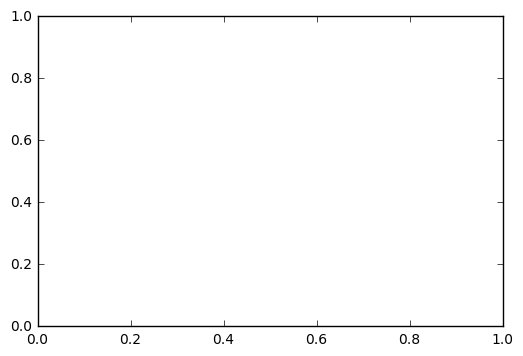

In [31]:
df = pd.read_csv('prostate.data', header = 0, delim_whitespace=True)
#print (df)
dfTrain = df[df.train == 'T']
dfTest = df[df.train == 'F']
dfTrain = dfTrain.drop('train', 1)
dfTest = dfTest.drop('train', 1)

dfScTrain = scaleData(dfTrain, 1, 'lpsa')
dfScTest = scaleData(dfTest, 1, 'lpsa')
#dfScTrain = dfTrain.copy()
#dfScTest = dfTest.copy()

print (dfScTrain)


In [32]:
ridge = sk.RidgeCV(alphas = np.arange(-20,20,0.01))
ridge.fit(dfScTrain.iloc[:, 0:8], dfScTrain.iloc[:, 8:9])
print (ridge.alpha_, ridge.coef_)

3.51 [[ 0.63591522  0.28854502 -0.11881213  0.20473644  0.291185   -0.19058621
   0.00588271  0.22138017]]


In [40]:
lasso = sk.LassoCV(alphas=np.arange(-20,20,0.05))
fit = lasso.fit(dfScTrain.iloc[:, 0:8], dfScTrain.iloc[:, 8:9].values.ravel())
print (lasso.alpha_, lasso.coef_)


0.1 [ 0.57487434  0.2300614  -0.          0.10508914  0.17173396  0.          0.
  0.0653523 ]
LassoCV(alphas=array([-20.  , -19.95, ...,  19.9 ,  19.95]), copy_X=True,
    cv=None, eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100,
    n_jobs=1, normalize=False, positive=False, precompute='auto',
    random_state=None, selection='cyclic', tol=0.0001, verbose=False)


/opt/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


In [34]:
linear = sk.LinearRegression()
linear.fit(dfScTrain.iloc[:, 0:8], dfScTrain.iloc[:, 8:9])
print (linear.coef_)

[[ 0.71640701  0.2926424  -0.14254963  0.2120076   0.30961953 -0.28900562
  -0.02091352  0.27734595]]


In [35]:
#PREDICTIN DOOM
predictedSet = (ridge.predict(dfScTest.iloc[:, 0:8]))
totalLoss = 0
for index, list in enumerate(predictedSet):
    loss = (list[0] -  dfScTest['lpsa'].iloc[index]) ** 2 
    totalLoss = totalLoss + loss    
print (totalLoss/len(predictedSet))

0.524107605502


In [36]:
predictedSet = (linear.predict(dfScTest.iloc[:, 0:8]))
totalLoss = 0
for index, list in enumerate(predictedSet):
    loss = (list[0] -  dfScTest['lpsa'].iloc[index]) ** 2 
    totalLoss = totalLoss + loss    
print (totalLoss/len(predictedSet))

0.549194139132


In [41]:
predictedSet = (lasso.predict(dfScTest.iloc[:, 0:8]))
totalLoss = 0
for index, list in enumerate(predictedSet):
    loss = (list -  dfScTest['lpsa'].iloc[index]) ** 2 
    totalLoss = totalLoss + loss    
print (totalLoss/len(predictedSet))

0.454982788477


      lcavol   lweight       age      lbph       svi       lcp   gleason  \
7  -0.669858 -0.537547  0.298149  0.311748 -0.491596 -0.908984 -1.051077   
9  -2.130049 -0.318246 -2.115437 -1.074047 -0.491596 -0.908984 -1.051077   
10 -1.165710 -1.298473  0.156173 -1.074047 -0.491596 -0.908984 -1.051077   
15 -0.217622 -0.642225 -0.695681 -1.074047 -0.491596 -0.232933  0.262769   
22  0.605487 -0.446076 -0.269754  0.906906 -0.491596  1.025657  0.262769   
25 -1.009322  0.106761  1.008027  0.993194 -0.491596 -0.908984 -1.051077   
26  0.014810 -1.697187  0.866051  0.093590 -0.491596 -0.908984 -1.051077   
28 -1.767289  0.766678  0.724076  1.143487 -0.491596 -0.908984  0.262769   
32 -1.205089  0.562165  0.440125  1.066144 -0.491596 -0.908984 -1.051077   
34 -1.371368 -1.221634 -1.121608 -1.074047 -0.491596 -0.908984 -1.051077   
36 -0.118878  1.610341  0.298149  1.389203 -0.491596 -0.908984  0.262769   
42  0.010260  0.157307  0.866051 -1.074047 -0.491596 -0.908984  0.262769   
44  0.327973